In [28]:
import numpy as np
import matplotlib.pyplot as plt

## The model problem
This is the problem we used to demonstrate the boundary layer technique
$$
\epsilon f'' + f' =2x-1 
$$


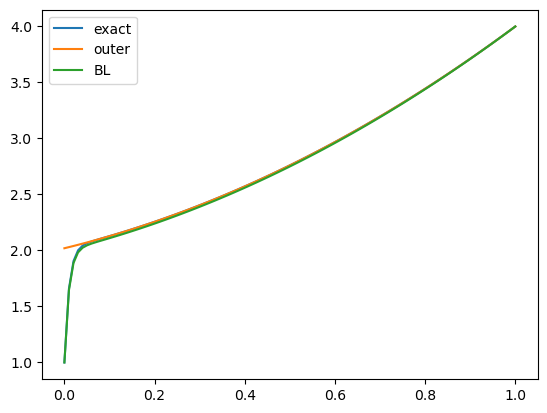

In [36]:
def f_exact(x,epsilon=0.01):
    out=x*x+x+2-np.exp(-x/epsilon)+epsilon*(2*(1-x)-2*np.exp(-x/epsilon))
    return out

def f_out(x,epsilon=0.01):
    out=x*x+x+2+epsilon*2*(1-x)
    return out

def f_BL(x,epsilon=0.01):
    out=x**2+x+2-np.exp(-x/epsilon)
    return out

def f_bad(x,epsilon=0.01,x_match=5):
    if (x<x_match):
        out=1
        return out
    


epsilon=0.01
x=np.linspace(0,1,100)


x_match=5
A5=(2+x_match*epsilon+(x_match*epsilon)**2-np.exp(-x_match))/(1-np.exp(-x_match))

plt.plot(x, f_exact(x, epsilon), label='exact')
plt.plot(x, f_out(x, epsilon), label='outer')
plt.plot(x, f_BL(x, epsilon), label='BL')
plt.legend()
#plt.xlim([0,0.03])
#plt.ylim([0.9,4.1])



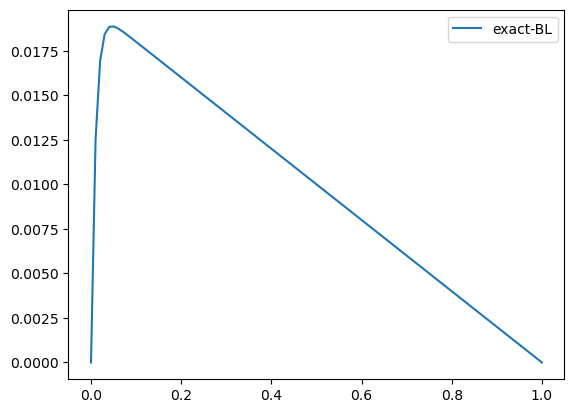

In [38]:
#plt.plot(x,f_exact(x,epsilon)-f_out(x,epsilon),label='exact-outer')
plt.plot(x,f_exact(x,epsilon)-f_BL(x,epsilon),label='exact-BL')
plt.legend()    

## Solving Boundary value problems 

### Shooting techniques

To answer this question, we can frame the problem into a boundary value problem for a second-order ODE. The ODE is:
$$
\displaystyle\frac{𝑑^2𝑦}{𝑑𝑡^2}=−𝑔
$$
with the two boundary conditions are: 𝑦(0)=0 and 𝑦(5)=50. And we want to answer the question, what’s the 𝑦′(0) at the launching?

This is a quite simple question, we can solve it analytically easily, with the correct answer 𝑦′(0)=34.5. Now let’s solve it using the shooting method. First, we will reduce the order of the function, the second-order ODE becomes:
$$
\begin{array}{rcl}
\displaystyle\frac{𝑑𝑦}{𝑑𝑡}&=&𝑣\\ \\
\displaystyle\frac{𝑑v}{𝑑𝑡}&=&−𝑔
\end{array}
$$

### Shooting tecnique
Define the rhs function

In [39]:
F = lambda t, s: \
  np.dot(np.array([[0,1],[0,-9.8/s[1]]]),s)


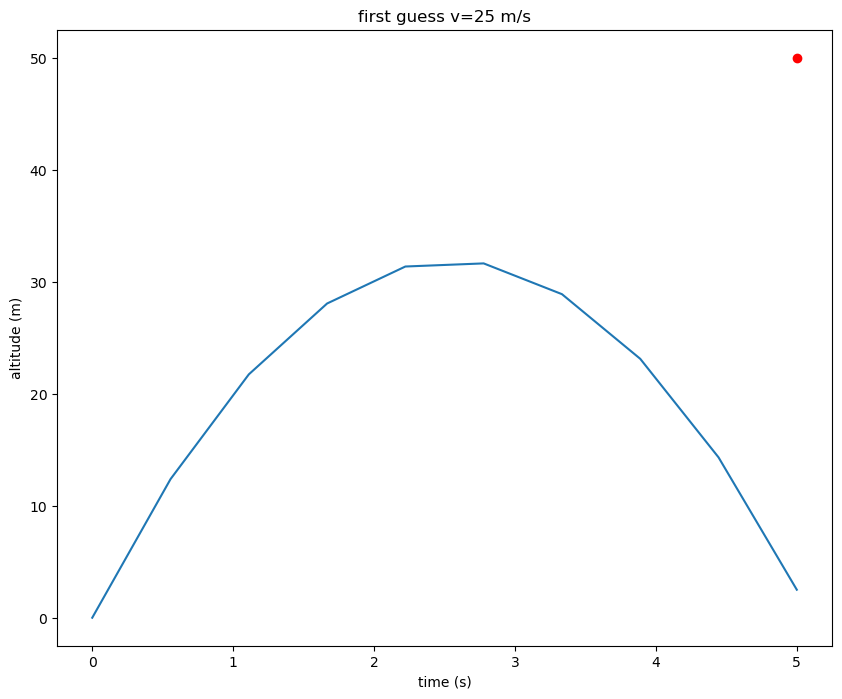

In [44]:
t_span = np.linspace(0, 5, 100)
y0 = 0
v0 = 25
t_eval = np.linspace(0, 5, 10)
sol = solve_ivp(F, [0, 5], \
                [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'first guess v={v0} m/s')
plt.show()

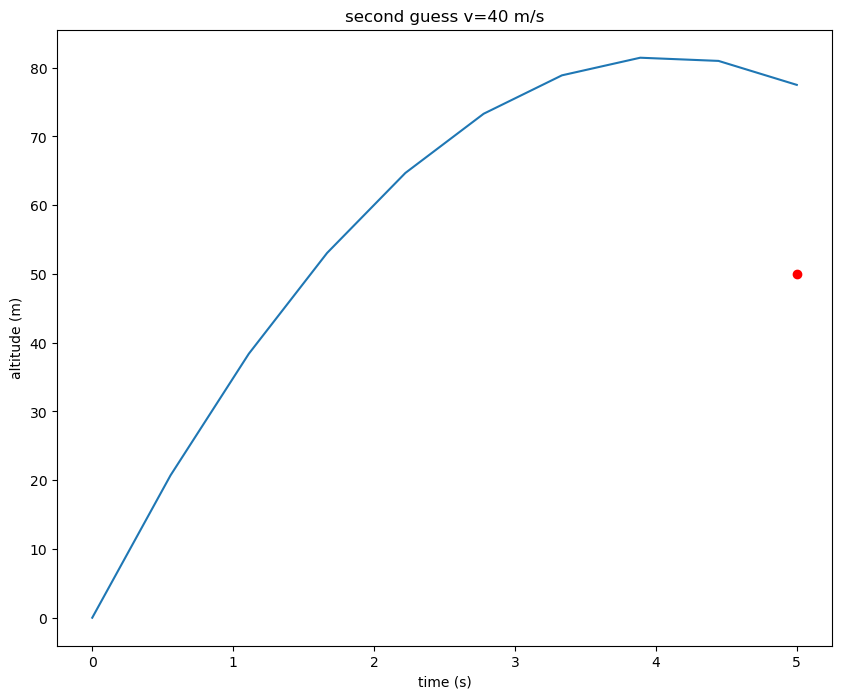

In [17]:
v0 = 40
sol = solve_ivp(F, [0, 5], \
            [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'second guess v={v0} m/s')
plt.show()

Make this into a function with the guess of v[0] as input

In [45]:
def solve_ode_shoot(v0, plot=True):
    t_span = np.linspace(0, 5, 100)
    y0 = 0
    t_eval = np.linspace(0, 5, 10)
    sol = solve_ivp(F, [0, 5], [y0, v0], t_eval=t_eval)
    
    if plot:
        plt.figure(figsize=(10, 8))
        plt.plot(sol.t, sol.y[0])
        plt.plot(5, 50, 'ro')
        plt.xlabel('time (s)')
        plt.ylabel('altitude (m)')
        plt.title(f'first guess v={v0} m/s')
        plt.show()
    else:
        sol.y[1][-1]
    


Try a few new values, v[0]=25 undershoot, v[0]=40 overshoot, what will be the next natural guess? 

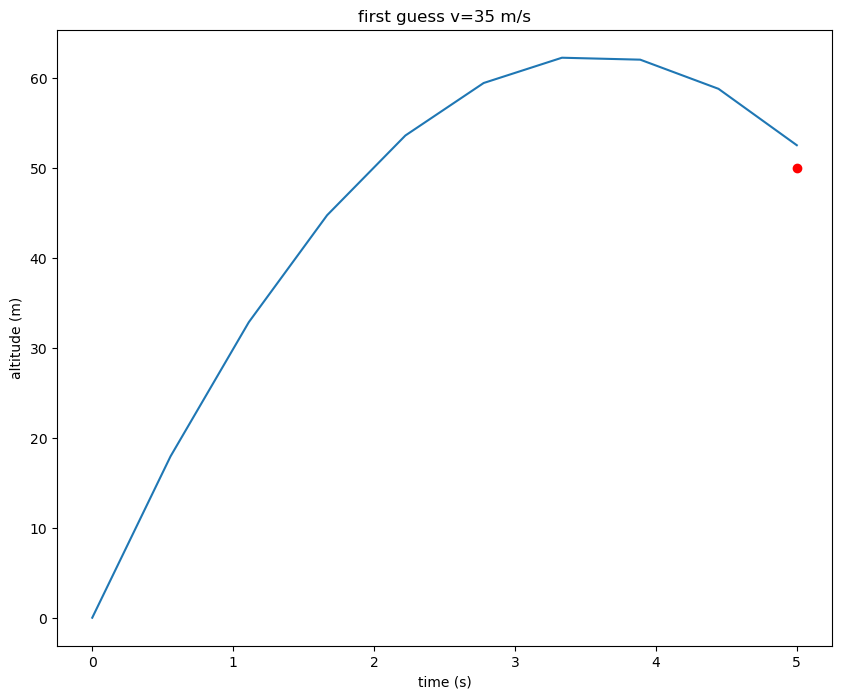

In [48]:
solve_ode_shoot(v0=35, plot=True)

Can be used by using fsolve in scipy.optimize

In [49]:
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp



y0 = [0, 40]  # Initial condition as a list of numerical values
t_eval = np.linspace(0, 5, 100)

def objective(v0):
    sol = solve_ivp(F, [0, 5], \
            [y0[0], v0[0]], t_eval = t_eval)
    y = sol.y[0]
    return y[-1] - 50

v0, = fsolve(objective, 10)
print(v0)

34.49999999999999


### Finite difference method
 central difference formulas in the finite difference methods due to the fact that they yield better accuracy. The differential equation is enforced only at the grid points, and the first and second derivatives are:
$$ 
\begin{array}{rcl} 
\displaystyle\frac{dy}{𝑑𝑥}&=&\displaystyle\frac{𝑦_{𝑖+1}−𝑦_{𝑖−1}}{2ℎ}\\ \\
\displaystyle\frac{d^2y}{𝑑x^2}&=&\displaystyle\frac{𝑦_{𝑖−1}−2𝑦_𝑖+𝑦_{𝑖+1}}{ℎ^2}
\end{array}
$$

Since the time interval is $[0,5]$ and we have 𝑛, using the finite difference approximated derivatives, we have
$$ 
\begin{array}{l} 
𝑦_0=0 \\ \\
𝑦_{𝑖−1}−2𝑦_𝑖+𝑦_{𝑖+1}=−𝑔ℎ^2, \ \ 𝑖=1,2,...,𝑛−1 \\ \\
𝑦_{n}=50
\end{array}
$$

or with matrix notation:

if we use matrix notation, we will have:
$$
\begin{bmatrix}
1 & 0 & 0 & \cdots & 0 & 0 & 0 \\
1 & -2 & 1 & \cdots & 0 & 0 & 0 \\
0 & 1 & -2 & 1 & \cdots & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & \cdots & 1 & -2 & 1 \\
0 & 0 & 0 & \cdots & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
y_0 \\
y_1 \\
y_2 \\
\vdots \\
y_{N-2} \\
y_{N-1}
\end{bmatrix}
=
\begin{bmatrix}
0 \\
-gh^2 \\
-gh^2 \\
\vdots \\
-gh^2 \\
50
\end{bmatrix}
$$

This can be solved using our expertise in linear algebra.

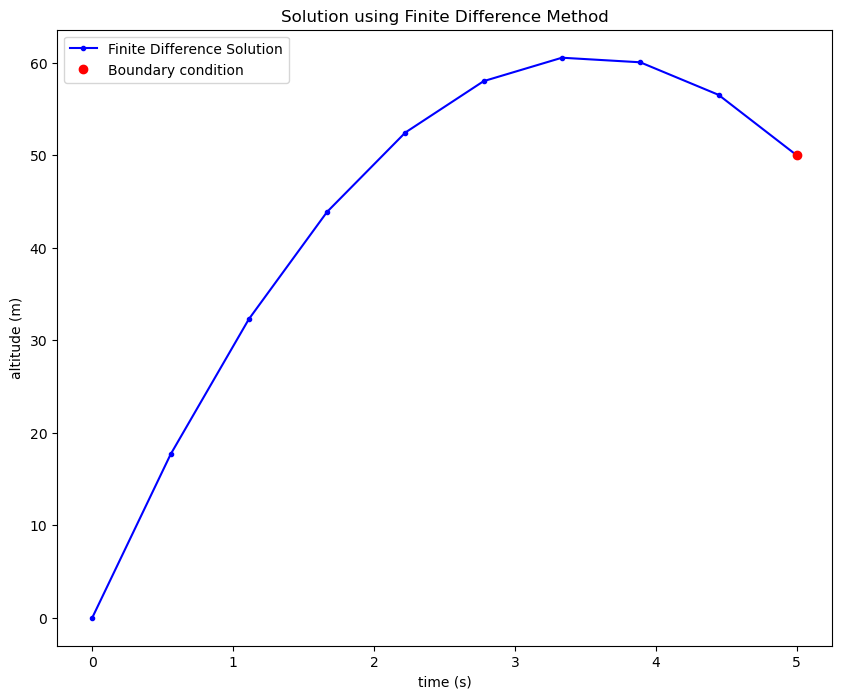

In [55]:
import numpy as np


# Define the parameters
L = 5  # Length of the domain
N = 10  # Number of grid points
dx = L / (N - 1)  # Grid spacing
g = 9.8  # Acceleration due to gravity

# Define the grid
x = np.linspace(0, L, N)

# Define the boundary conditions
y0 = 0
yL = 50

# Initialize the solution array
y = np.zeros(N)

# Set the boundary conditions
y[0] = y0
y[-1] = yL

# Construct the coefficient matrix and the right-hand side vector
A = np.zeros((N, N))
b = np.zeros(N)

# Fill the coefficient matrix and the right-hand side vector
for i in range(1, N-1):
    A[i, i-1] = 1 
    A[i, i] = -2 
    A[i, i+1] = 1 
    b[i] = -g*dx**2

# Apply the boundary conditions to the coefficient matrix and the right-hand side vector
A[0, 0] = 1
A[-1, -1] = 1
b[0] = y0
b[-1] = yL

# Solve the system of linear equations
y = np.linalg.solve(A, b)

# Plot the solution
plt.figure(figsize=(10, 8))
plt.plot(x, y, 'b.-',label='Finite Difference Solution')
plt.plot(5, 50, 'ro', label='Boundary condition')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.legend()
plt.title('Solution using Finite Difference Method')
plt.show()

### Using scipys solve_bvp

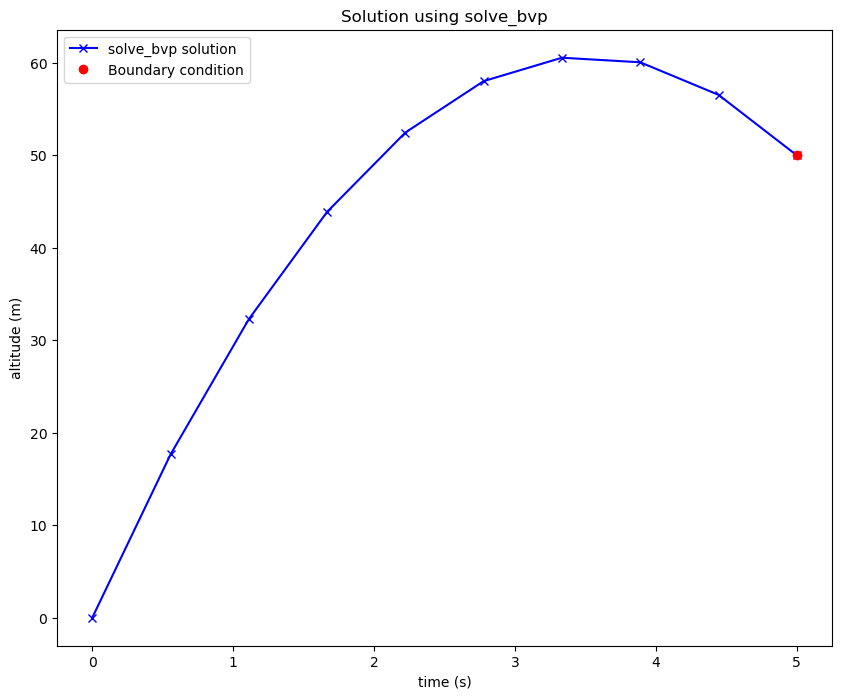

In [58]:
from scipy.integrate import solve_bvp

# Define the differential equations
def fun(t, y):
    return np.vstack((y[1], -9.8 * np.ones_like(y[0])))

# Define the boundary conditions
def bc(ya, yb):
    return np.array([ya[0], yb[0] - 50])

# Initial guess for the solution
t_guess = np.linspace(0, 5, 10)
y_guess = np.zeros((2, t_guess.size))
y_guess[1] = 34.5  # Initial guess for y'

# Solve the BVP
sol_bvp = solve_bvp(fun, bc, t_guess, y_guess)

# Plot the solution
plt.figure(figsize=(10, 8))
plt.plot(sol_bvp.x, sol_bvp.y[0], 'bx-',label='solve_bvp solution')
plt.plot(5, 50, 'ro', label='Boundary condition')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.legend()
plt.title('Solution using solve_bvp')
plt.show()

## Try this on our model problem. 


In [ ]:
def f_exact(x,epsilon=0.01):
    out=x*x+x+2-np.exp(-x/epsilon)+epsilon*(2*(1-x)-2*np.exp(-x/epsilon))
    return out

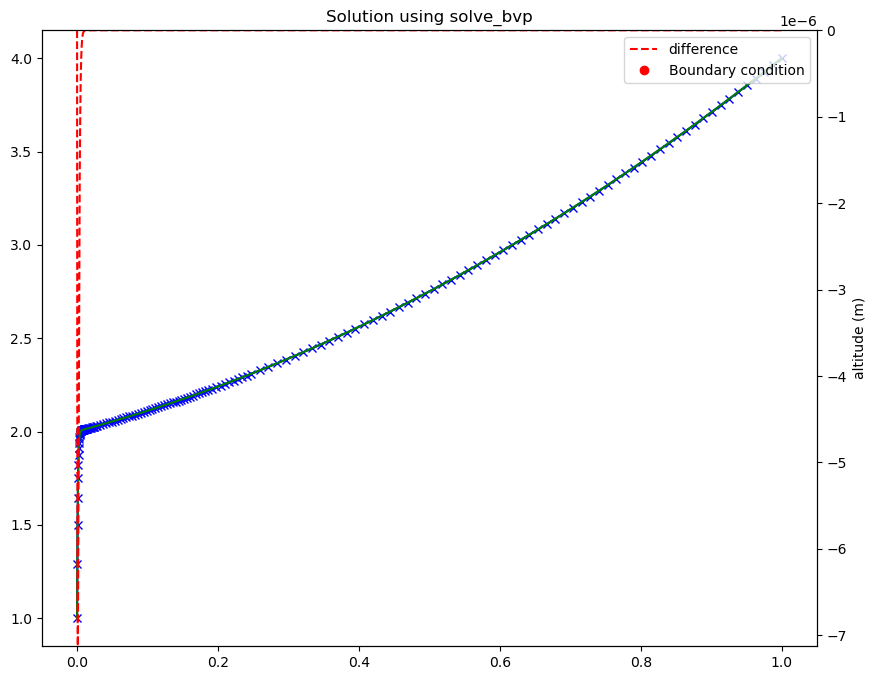

In [72]:
from scipy.integrate import solve_bvp
epsilon=0.001
# Define the differential equations
def fun(t, y):
    return np.vstack((y[1], (-y[1]+2*t+1)/epsilon))

# Define the boundary conditions
def bc(ya, yb):
    return np.array([ya[0]-1, yb[0] - 4])

# Initial guess for the solution
t_guess = np.linspace(0, 1, 10)
y_guess = np.zeros((2, t_guess.size))
#y_guess[1] =   # Initial guess for y'

# Solve the BVP
sol_bvp = solve_bvp(fun, bc, t_guess, y_guess)

# Plot the solution
plt.figure(figsize=(10, 8))
plt.plot(sol_bvp.x, sol_bvp.y[0], 'bx-',label='solve_bvp solution')
plt.plot(sol_bvp.x, f_exact(sol_bvp.x,epsilon), 'g-',label='exact solution')
ax2 = plt.twinx()
sol_diff=sol_bvp.y[0] - f_exact(sol_bvp.x, epsilon)
ax2.plot(sol_bvp.x, sol_diff, 'r--', label='difference')
ax2.set_ylim([np.min(sol_diff), np.max(sol_diff)])
plt.plot(1, 4, 'ro', label='Boundary condition')
plt.plot(0, 1, 'ro' )
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.legend()
plt.title('Solution using solve_bvp')
plt.show()

In [70]:
sol_bvp.y[0] - f_exact(sol_bvp.x, epsilon)

array([ 0.00000000e+00, -4.71729980e-06, -6.69560621e-06, -7.12767017e-06,
       -6.74454665e-06, -5.98314059e-06, -5.09538363e-06, -4.21881140e-06,
       -3.42175169e-06, -2.73191665e-06, -2.15422650e-06, -1.68170757e-06,
       -1.30198347e-06, -1.00099983e-06, -7.65041721e-07, -5.81721046e-07,
       -4.40362099e-07, -3.32051392e-07, -2.49514233e-07, -1.86914439e-07,
       -1.39632232e-07, -1.04049839e-07, -7.73590685e-08, -5.73961576e-08,
       -4.25042797e-08, -3.14215689e-08, -2.31914354e-08, -1.70916690e-08,
       -1.25789725e-08, -9.24595067e-09, -6.78799150e-09, -4.97792252e-09,
       -3.64672381e-09, -2.66890643e-09, -1.95148253e-09, -1.42567425e-09,
       -1.04068931e-09, -7.59078578e-10, -5.53267654e-10, -4.02978539e-10,
       -2.93321367e-10, -2.68408407e-10, -1.95976124e-10, -5.84621240e-10,
       -2.85005797e-10, -1.07233777e-10, -3.61310981e-11, -1.14468435e-11,
       -3.48654439e-12, -1.03339559e-12, -2.97539771e-13, -6.08402217e-14,
       -2.39808173e-14, -